In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import pandas as pd

# Загрузим данные

Классы:
```
0 T-shirt/top 
1 Trouser 
2 Pullover 
3 Dress 
4 Coat 
5 Sandal 
6 Shirt 
7 Sneaker 
8 Bag 
9 Ankle boot
```




In [2]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_val.shape)
print (y_train[:10])
print (y_val[:10])

(60000, 28, 28)
(10000, 28, 28)
[9 0 0 3 0 2 7 2 5 5]
[9 2 1 1 6 1 4 6 5 7]


Пример картинки:


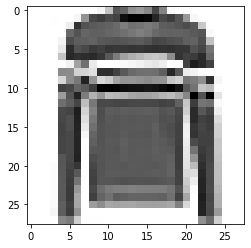

In [5]:
x_train_image = np.tile(x_train[5, :, :][:, :], 1)
print("Пример картинки:")
plt.imshow(x_train_image, cmap="Greys")
plt.show()

In [6]:
# one-hot encode для ответов
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)
print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [9 0 0 3 0]


# Model

In [51]:
K.clear_session()
model = M.Sequential()
model.add(L.Conv2D(16, kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 1)))
model.add(L.MaxPool2D())
model.add(L.Conv2D(32, kernel_size=3, strides=1, padding='same'))
model.add(L.MaxPool2D())
model.add(L.Conv2D(64, kernel_size=3, strides=1, padding='same'))
model.add(L.Flatten())
model.add(L.Dense(64, activation='relu', input_shape=(x_train.shape[1],))) # input_shape - кол-во признаков в датафрейме
model.add(L.Dense(32, activation='relu'))
model.add(L.Dense(16, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [53]:
model.compile(
    loss='categorical_crossentropy',  # минимизируем кросс-энтропию
    optimizer='adam', 
    metrics=['accuracy']
)

In [54]:
x_train_float = x_train.astype(np.float) / 255 - 0.5 # нормализация
x_val_float = x_val.astype(np.float) / 255 - 0.5

In [55]:
model.fit(
    x_train_float[:, :, :, np.newaxis], 
    y_train_oh,
    batch_size=32, 
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6642 - accuracy: 0.7633
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3056 - accuracy: 0.8879
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2559 - accuracy: 0.9054
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2330 - accuracy: 0.9125
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2025 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1835 - accuracy: 0.9325
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1602 - accuracy: 0.9391
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1542 - accuracy: 0.9425
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1377 - accuracy: 0.9490
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.119

In [56]:
predictions = model.predict_classes(x_val_float[:, :, :, np.newaxis])
print(f"accuracy = {accuracy_score(predictions, y_val)}")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy = 0.9111
